# Regression Models

In this notebook we employ several different types of linear regression to predict the housing data and generate the root-mean-squared error calculation. 

### I. Import Libraries, Packages, and Data

In [1]:
#brew install libomp
#pip install xgboost
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#We first import the df_train2 csv file into our notebook. Recall that this was the file that had been preprocessed/feature engineered.
df_trainRegression = pd.read_csv('df_train2.csv', sep='\t')

## 1. OLS Multiple Regression

### 1.1. OLS Multiple Regression Preprocessing

Recall that we determined that for our analysis, we will use 'OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd' as the variables to expain 'SalePrice' as these have the highest correlations with our dependent variable.

In [3]:
# Select model dependent and independent variables
LR1Xtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
LR1Ytrain = pd.DataFrame(data=df_trainRegression,columns=['SalePrice'])

In [12]:
# Cut data into train and test
lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(LR1Xtrain, LR1Ytrain,
                                                    test_size=0.25,random_state=2)

lr_x_train.shape, lr_x_test.shape

((1092, 9), (364, 9))

### 1.2. OLS Multiple Regression Model

In [14]:
# Instantiate Model
lr = LinearRegression()

# Train/fit Model
lr.fit(lr_x_train, lr_y_train)

# Predict Labels
lr_predict = lr.predict(lr_x_test)

# Get Values Back
lr_prediction = np.exp(lr_predict)


In [15]:
#Calculate RMSE for linear regression
lr_rmse = mean_squared_error(np.log(lr_prediction),
                              lr_y_test)
                                     
print('Linear Regression RMSE =', lr_rmse)

Linear Regression RMSE = 0.024787912522198273


Text(0.5, 1.0, 'OLS Predictions of Sale Price vs Actual Sale Price')

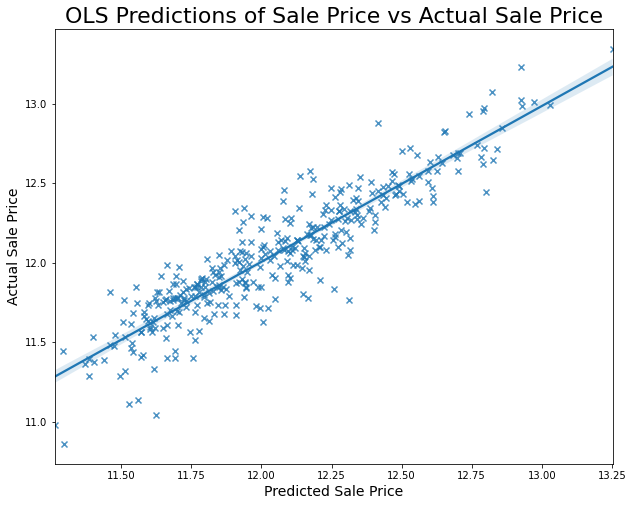

In [16]:
# Create scatterplot to show predicted values versus actual values
lr_preds = lr.predict(lr_x_test)

plt.figure(figsize=(10,8))
sns.regplot(data=lr_x_train, x=lr_preds, y=np.ravel(lr_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('OLS Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 2. Ridge Regression

### 2.1. Ridge Model Preprocessing

Multiple linear regression may be susceptible to overfitting, and Lasso and Ridge regressions could help to prevent this.  Ridge regression both shrinks the coefficients, and could reduce multicollinearity. 

In [17]:
# Select model dependent and independent variables
rr1Xtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
rr1Ytrain = pd.DataFrame(data= df_trainRegression,columns=['SalePrice'])

# Scale Data
rr_ss = StandardScaler()
rr_ss.fit_transform(rr1Xtrain)

# Cut data into train and test
rr_x_train, rr_x_test, rr_y_train, rr_y_test = train_test_split(rr1Xtrain, rr1Ytrain,
                                                    test_size=0.25,random_state=2)

rr_x_train.shape, rr_x_test.shape

((1092, 9), (364, 9))

### 2.2. Ridge Regression Model

In [18]:
# Instantiate model, using linspace to get alphas (regularization strength)
ridge = RidgeCV(alphas=np.linspace(1, 200, 100))

# Fit Model
ridge_model = ridge.fit(rr_x_train, rr_y_train)

# Predict label
rr_predict = ridge_model.predict(rr_x_test)

# De-scale/Convert back to data value
rr_prediction = np.exp(rr_predict)

In [19]:
#Calculate RMSE
rr_rmse = mean_squared_error(np.log(rr_prediction),
                             rr_y_test)
                                     
print('Linear Regression RMSE =', rr_rmse)

Linear Regression RMSE = 0.02474298302292999


Text(0.5, 1.0, 'Ridge Predictions of Sale Price vs Actual Sale Price')

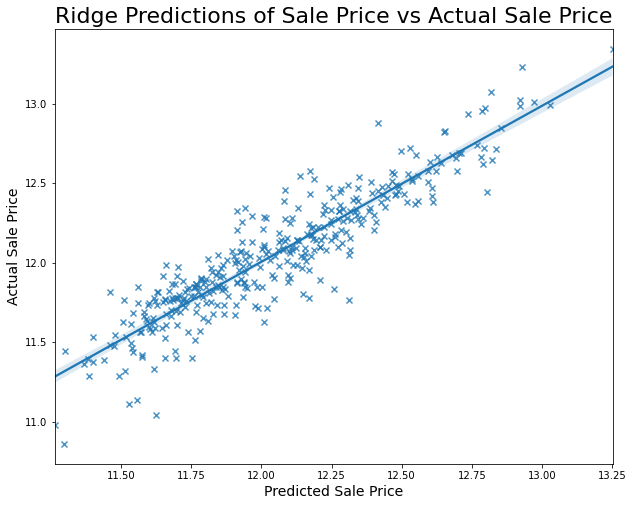

In [20]:
# Create scatterplot to show predicted values versus actual values
rr_preds = ridge.predict(rr_x_test)

plt.figure(figsize=(10,8))
sns.regplot(data=rr_x_train, x=rr_preds, y=np.ravel(rr_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Ridge Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 3. Lasso Model

### 3.1. Lasso Model Preprocessing

In [21]:
# Select model dependent and independent variables
lm1Xtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
lm1Ytrain = pd.DataFrame(data= df_trainRegression,columns=['SalePrice'])

# Scale Data
lm_ss = StandardScaler()
lm_ss.fit_transform(lm1Xtrain)

# Cut data into train and test
lm_x_train, lm_x_test, lm_y_train, lm_y_test = train_test_split(lm1Xtrain, lm1Ytrain,
                                                    test_size=0.25,random_state=2)

lm_x_train.shape, lm_x_test.shape

((1092, 9), (364, 9))

### 3.2. Lasso Model

In [22]:
# Initiate Model with alphas of 100
lasso = LassoCV(n_alphas=100)

# Trian Model
lasso.fit(lm_x_train,np.ravel(lm_y_train))

# Predict Labels
lm_predict = lasso.predict(lm_x_test)

# Convert back to data value
lm_prediction = np.exp(lm_predict)

In [23]:
#Calculate RMSE
lm_rmse = mean_squared_error(np.log(lm_prediction),
                             lm_y_test)
                                     
print('Lasso Model Regression RMSE =', lm_rmse)

Lasso Model Regression RMSE = 0.033628673718841345


Text(0.5, 1.0, 'Lasso Predictions of Sale Price vs Actual Sale Price')

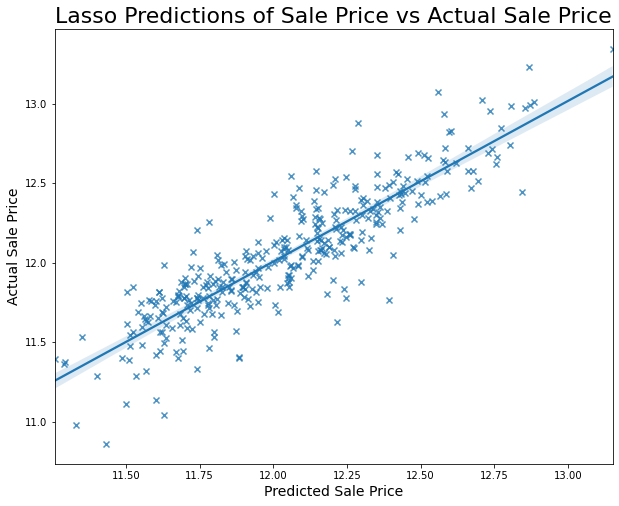

In [24]:
# Create scatterplot to show predicted values versus actual values
lm_preds = lasso.predict(lm_x_test)

plt.figure(figsize=(10,8))
sns.regplot(data=lm_x_train, x=lm_preds, y=np.ravel(lm_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Lasso Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 4. Elasticnet Regression

### 4.1. Elasticnet Preprocessing

In [25]:
# Select model dependent and independent variables
er1Xtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
er1Ytrain = pd.DataFrame(data= df_trainRegression,columns=['SalePrice'])

# Scale Data
er_ss = StandardScaler()
er_ss.fit_transform(er1Xtrain)

# Cut data into train and test
er_x_train, er_x_test, er_y_train, er_y_test = train_test_split(er1Xtrain, er1Ytrain,
                                                    test_size=0.25,random_state=2)

er_x_train.shape, er_x_test.shape

((1092, 9), (364, 9))

### 4.2. Elasticnet Model

In [26]:
# Initiate Model
elasticnet_alphas = np.arange(0.01, 1.0, 0.005)
elasticnet_ratio = 0.5
elasticnet = ElasticNetCV(alphas=elasticnet_alphas, l1_ratio=elasticnet_ratio, cv=5, max_iter=5_000)

# Train Model
enet = elasticnet.fit(er_x_train, np.ravel(er_y_train))

# Predict Labels
er_predict = enet.predict(er_x_test)

# Convert back to data value
er_prediction = np.exp(er_predict)

In [27]:
#Calculate RMSE
er_rmse = mean_squared_error(np.log(er_prediction),
                             er_y_test)
                                     
print('Elasticnet Model Regression RMSE =', er_rmse)

Elasticnet Model Regression RMSE = 0.024920651907556823


Text(0.5, 1.0, 'Elasticnet Predictions of Sale Price vs Actual Sale Price')

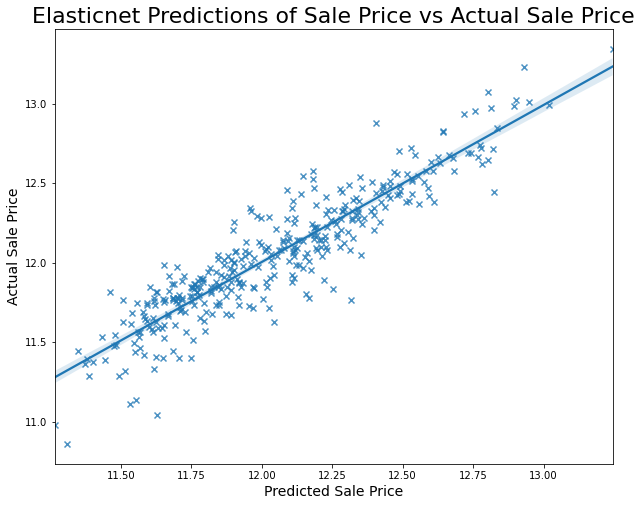

In [28]:
# Create scatterplot to show predicted values versus actual values
er_preds = elasticnet.predict(lm_x_test)

plt.figure(figsize=(10,8))
sns.regplot(data=er_x_train, x=er_preds, y=np.ravel(er_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Elasticnet Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 5. Gradient Boost Model

### 5.1. Gradient Boost Preprocessing

In [29]:
# Select model dependent and independent variables
gb1Xtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
gb1Ytrain = pd.DataFrame(data= df_trainRegression,columns=['SalePrice'])

# Scale Data
gb_ss = StandardScaler()
gb_ss.fit_transform(gb1Xtrain)

# Cut data into train and test
gb_x_train, gb_x_test, gb_y_train, gb_y_test = train_test_split(gb1Xtrain, gb1Ytrain,
                                                    test_size=0.25,random_state=2)

gb_x_train.shape, gb_x_test.shape

((1092, 9), (364, 9))

### 5.2. Gradient Boost Model

In [30]:
# Initiate the model
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, random_state =85)

# Train the Model
gbr.fit(gb_x_train,np.ravel(gb_y_train))

# Predict the labels
gb_predict = gbr.predict(gb_x_test)

# Transform back to values
gb_prediction = np.exp(gb_predict)

In [31]:
#Calculate RMSE
gb_rmse = mean_squared_error(np.log(gb_prediction),
                             gb_y_test)
                                     
print('Gradient Boost Model Regression RMSE =', gb_rmse)

Gradient Boost Model Regression RMSE = 0.029133110725273772


Text(0.5, 1.0, 'Gradient Boost Predictions of Sale Price vs Actual Sale Price')

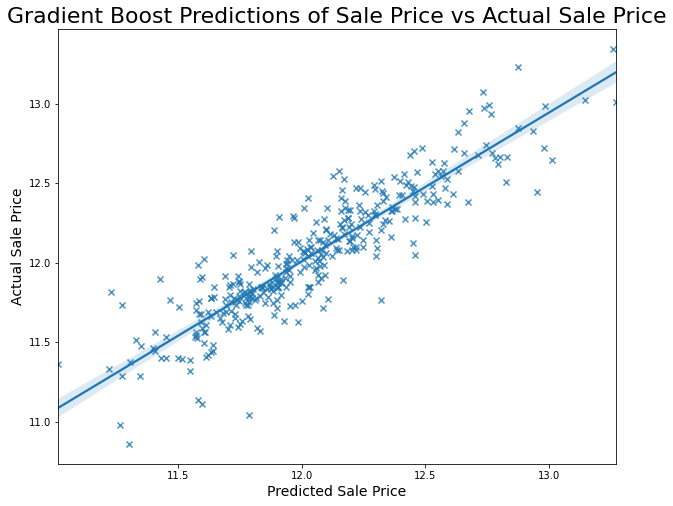

In [32]:
# Create scatterplot to show predicted values versus actual values
gb_preds = gbr.predict(gb_x_test)

plt.figure(figsize=(10,8))
sns.regplot(data=gb_x_train, x=gb_preds, y=np.ravel(gb_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Gradient Boost Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 6. XG Boost Model

### 6.1. XG Boost Preprocessing

In [33]:
# Select model dependent and independent variables
xg1Xtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
xg1Ytrain = pd.DataFrame(data= df_trainRegression,columns=['SalePrice'])

# Scale Dataa
xg_ss = StandardScaler()
xg_ss.fit_transform(xg1Xtrain)

# Cut data into train and test
xg_x_train, xg_x_test, xg_y_train, xg_y_test = train_test_split(xg1Xtrain, xg1Ytrain,
                                                    test_size=0.25,random_state=2)

xg_x_train.shape, xg_x_test.shape

((1092, 9), (364, 9))

### 6.2. XG Boost Model

In [34]:
# Initiate Model
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3000)

# Train Model
xgboost.fit(xg_x_train,xg_y_train)

# Predict labels
xg_predict = xgboost.predict(xg_x_test)

# Transform back to values
xg_prediction = np.exp(xg_predict)

In [35]:
#Calculate RMSE
xg_rmse = mean_squared_error(np.log(xg_prediction),
                             gb_y_test)
                                     
print('XG Boost Model Regression RMSE =', xg_rmse)

XG Boost Model Regression RMSE = 0.027226188758273515


Text(0.5, 1.0, 'XG Boost Predictions of Sale Price vs Actual Sale Price')

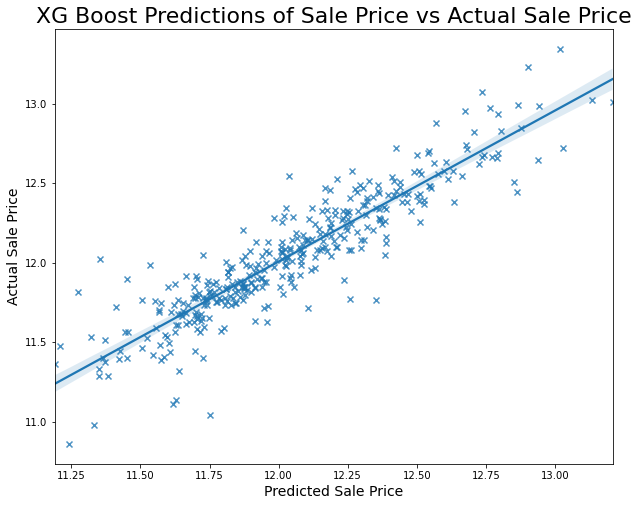

In [36]:
# Create scatterplot to show predicted values versus actual values
xg_preds = xgboost.predict(gb_x_test)

plt.figure(figsize=(10,8))
sns.regplot(data=xg_x_train, x=xg_preds, y=np.ravel(xg_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('XG Boost Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 7. KNN Model

### 7.1. KNN Preprocessing

In [121]:
KNNXtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
KNNYtrain = np.exp(pd.DataFrame(data= df_trainRegression,columns=['SalePrice']))


# Encode labels
knn_enc = preprocessing.LabelEncoder()
KNNYtrain = knn_enc.fit_transform(np.ravel(KNNYtrain))

# Cut data into train and test
knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(KNNXtrain, KNNYtrain,
                                                    test_size=0.25,random_state=2)

knn_x_train.shape, knn_x_test.shape

((1092, 9), (364, 9))

### 7.2. KNN Model

In [122]:
#Initiate KNN Classifier and set the number of neighbors to the K_value
#array
nn = KNeighborsClassifier(n_neighbors = 1)
    
# Fit KNN Model
nn.fit(knn_x_train, np.ravel(knn_y_train))
    
# Predict Lable
knn_predict = nn.predict(knn_x_test)

# Get Values back
knn_prediction = knn_enc.inverse_transform(knn_predict)

In [123]:

knn_rmse = mean_squared_error(np.log(knn_enc.inverse_transform(knn_y_test)), 
                              np.log(knn_prediction))
print("KNN RMSE =", knn_rmse)

KNN RMSE = 0.0723262653603393


Text(0.5, 1.0, 'KNN Predictions of Sale Price vs Actual Sale Price')

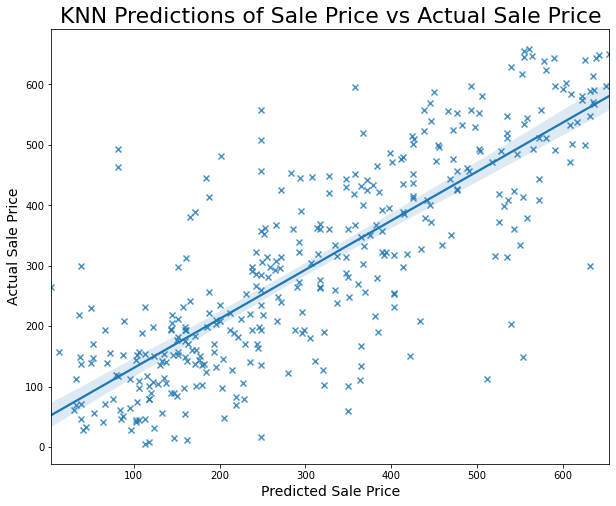

In [130]:
plt.figure(figsize=(10,8))
sns.regplot(data=knn_x_train, x=knn_predict, y=np.ravel(knn_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('KNN Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 8. Random Forest Model

### 8.1. Random Forest Preprocessing

In [75]:
RFXtrain = pd.DataFrame(data=df_trainRegression,columns=['OverallQual', 'TotSqFt', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'FullBath', 'YearBuilt', 'YearRemodAdd'])
RFYtrain = np.exp(pd.DataFrame(data= df_trainRegression,columns=['SalePrice']))

# Encode labels
rf_enc = preprocessing.LabelEncoder()
RFYtrain = rf_enc.fit_transform(np.ravel(RFYtrain))

# Cut data into train and test
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(RFXtrain, RFYtrain,
                                                    test_size=0.25,random_state=2)

rf_x_train.shape, rf_x_test.shape

((1092, 9), (364, 9))

In [77]:
# Initiate Model
clf = RandomForestClassifier(n_estimators=134)

#Fit the model
clf.fit(rf_x_train, rf_y_train)

# Predict Labels
rf_predict = clf.predict(rf_x_test)

# De encode values
rf_prediction = rf_enc.inverse_transform(rf_predict)

In [80]:
rf_rmse = mean_squared_error(np.log(rf_enc.inverse_transform(rf_y_test)), 
                             np.log(rf_prediction))

print("Random Forrest RMSE =", rf_rmse)

Random Forrest RMSE = 0.05031978367679409


Text(0.5, 1.0, 'Random Forrest Predictions of Sale Price vs Actual Sale Price')

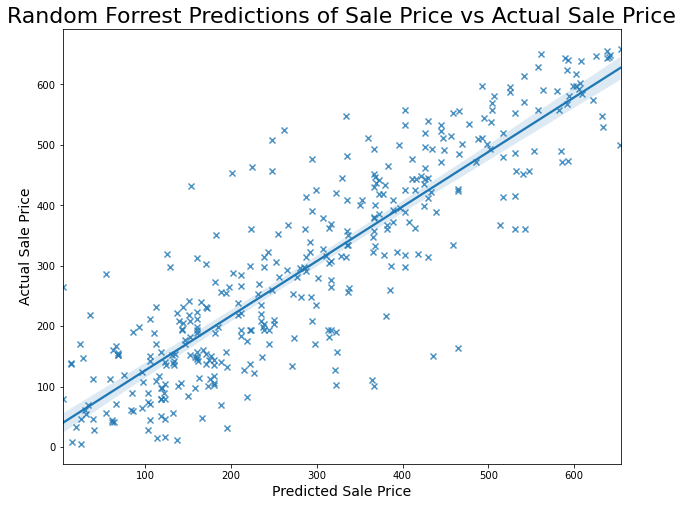

In [133]:
plt.figure(figsize=(10,8))
sns.regplot(data=rf_x_train, x=rf_predict, y=np.ravel(rf_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Random Forrest Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 9. AdaBoost Classifier

In [144]:
# Initiate Model
clf = AdaBoostClassifier()

# Fit Model
clf.fit(rf_x_train, rf_y_train)

# Predict Labels
abc_predict = clf.predict(rf_x_test)

# Get Values Back
abc_prediction = rf_enc.inverse_transform(abc_predict)


In [145]:
rf_rmse = mean_squared_error(np.log(rf_enc.inverse_transform(rf_y_test)), 
                             np.log(adb_prediction))

print("Random Forrest RMSE =", rf_rmse)

Random Forrest RMSE = 0.11897687126852856


Text(0.5, 1.0, 'Adaboost Classifier Predictions of Sale Price vs Actual Sale Price')

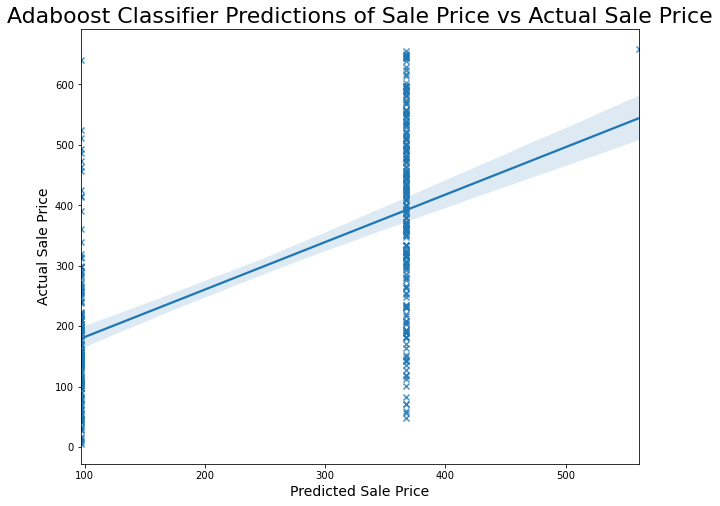

In [146]:
plt.figure(figsize=(10,8))
sns.regplot(data=rf_x_train, x=abc_predict, y=np.ravel(rf_y_test), marker='x')
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Adaboost Classifier Predictions of Sale Price vs Actual Sale Price', fontsize=22)

## 10. Ensemble

In [138]:
ensemble_value = []

for i in range(len(knn_y_test)):
    ensemble_value.append((lr_prediction[i] +
                           rr_prediction[i] +
                           lm_prediction[i] +
                           er_prediction[i] +
                           gb_prediction[i] +
                           xg_prediction[i])/6)
                           #knn_prediction[i]+
                           #rf_prediction[i] +
                           #abc_prediction[i])/6)

In [139]:
rmse = mean_squared_error(lr_y_test,
                          np.log(ensemble_value))

print(rmse)

0.023020371880556625
